In [77]:
import pandas as pd
import numpy as np

In [104]:
df = pd.read_csv('data.csv')

In [79]:
# 查看数据情况

In [80]:
# 查看前5行数据

In [105]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [82]:
# RFM
# 最近一次消费 (Recency)
# 消费频率 (Frequency)
# 消费金额 (Monetary)

In [83]:
# 为了构建用户聚类模型，需要处理的数据有   
# InvoiceDate  --> 日期间隔
# InvoiceNo    --> 消费次数
# UnitPrice    --> 消费金额

# 预处理数据

### 1.将用户ID从float 类型转为 字符串类型

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [108]:
df.CustomerID = df.CustomerID.astype('str')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


### 2.处理异常值

In [110]:
# describe 查看数据情况

In [111]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [112]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [113]:
# 发现 Quantity / UnitPrice 有小于0的情况
# 处理措施：只保留 Quantity >0 且 UnitPrice >0 的数据

In [114]:
df = df.loc[(df.Quantity > 0)
           &(df.UnitPrice > 0 )]

In [115]:
df.describe()

,Quantity,UnitPrice
count,530104.000000,530104.000000
mean,10.542037,3.907625
std,155.524124,35.915681
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


In [116]:
# 发现 Quantity 以及 UnitPrice 最大值，远远大于正常值

In [117]:
# 简单处理：最大值 = q3 + 1.5 IQR
# 即
# Quantity_max  = df.Quantity.quantile(0.75) + 1.5*(df.Quantity.quantile(0.75)  - df.Quantity.quantile(0.25))
# UnitPrice_max = df.UnitPrice.quantile(0.75)+ 1.5*(df.UnitPrice.quantile(0.75) - df.UnitPrice.quantile(0.25))

In [118]:
df.describe()

,Quantity,UnitPrice
count,530104.000000,530104.000000
mean,10.542037,3.907625
std,155.524124,35.915681
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


In [119]:
Quantity_IQR = df.Quantity.quantile(q=0.75) - df.Quantity.quantile(q=0.25)

In [120]:
Quantity_max = df.Quantity.quantile(q=0.75) + 1.5 * Quantity_IQR

In [121]:
UnitPrice_IQR = df.UnitPrice.quantile(q=0.75) - df.UnitPrice.quantile(q=0.25)

In [122]:
UnitPrice_max = df.UnitPrice.quantile(q=0.75) + 1.5 * UnitPrice_IQR

In [123]:
UnitPrice_max

8.45

In [124]:
df = df.loc[(df.Quantity < Quantity_max)
           &(df.UnitPrice < UnitPrice_max)]

In [125]:
df.describe()

,Quantity,UnitPrice
count,436166.000000,436166.000000
mean,4.938260,2.699178
std,4.508586,1.927294
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,8.000000,3.750000
max,23.000000,8.330000


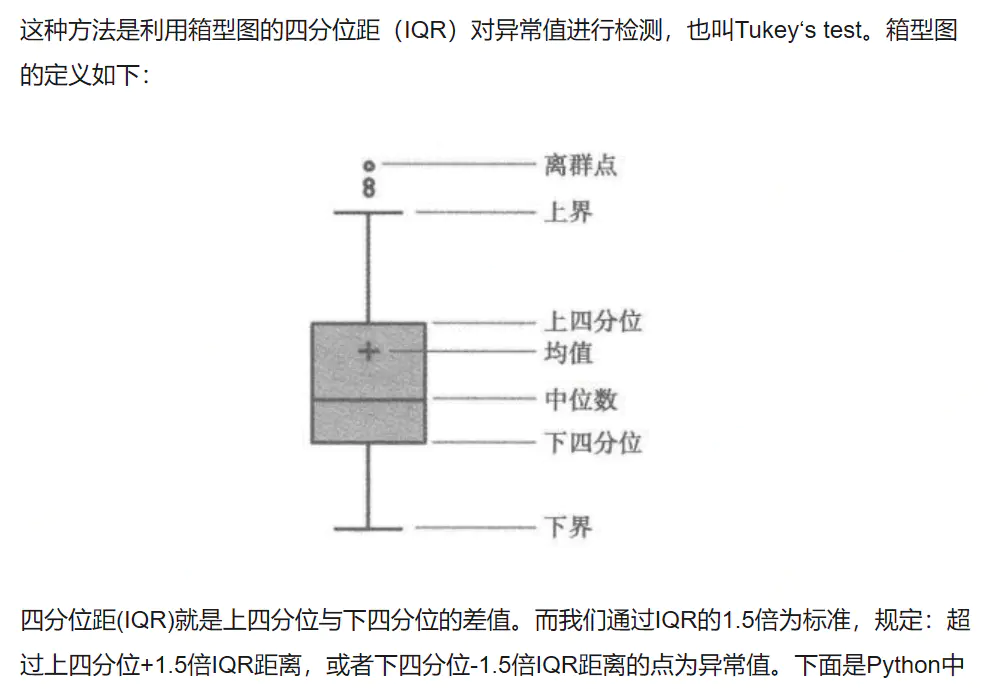

### 3.处理缺失值

In [17]:
# 查看缺失值情况
# isna().sum()

# nan
# Null
# None

In [135]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [141]:
df = df.loc[(~df.CustomerID.isin(['nan','Null','None','null']))]

In [143]:
df = df.loc[~df.CustomerID.isna()]

In [144]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [19]:
# 由于是对用户进行聚类，缺失用户id，则无法进行
# 所以这里需要删除空缺的用户
# dropna

### 4.处理重复值

In [36]:
# 处理重复值，这个操作基本上都容易忽视

In [147]:
df.shape

(321007, 8)

In [148]:
df.drop_duplicates().shape

(316093, 8)

In [150]:
df = df.drop_duplicates()

In [151]:
df.drop_duplicates().shape

(316093, 8)

In [152]:
df.shape

(316093, 8)

### 5.处理时间

In [ ]:
# 将日期转为 date 类型
# DatetimeIndex(df.InvoiceDate).date
# date

In [153]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [157]:
import warnings

In [158]:
warnings.filterwarnings('ignore')

In [159]:
df['date'] = pd.DatetimeIndex(df.InvoiceDate).date

In [160]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


### 6.处理购买总金额

In [ ]:
# total_bill = Quantity * UnitPrice

In [161]:
df['total_bill'] = df['Quantity'] * df['UnitPrice']

In [162]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,total_bill
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [164]:
6 * 3.39

20.34

### 7.处理 RFM 相关列 

In [45]:
# 目的：以用户为分组，计算 距上次购买的间隔天数，总购买次数，总购买金额

In [167]:
rfm = df.groupby('CustomerID').agg({'date':'max','InvoiceNo':'nunique','total_bill':'sum'}).reset_index()

In [168]:
rfm.head()

,CustomerID,date,InvoiceNo,total_bill
0,12347.0,2011-12-07,7,2866.77
1,12348.0,2011-04-05,1,17.00
2,12349.0,2011-11-21,1,1155.75
3,12350.0,2011-02-02,1,274.00
4,12352.0,2011-11-03,7,1147.44


In [57]:
# 由于在Kaggle上下# 由于在Kaggle上下载的数据较早，作为演示效果，设定最大时间为当前日期

In [169]:
now = rfm.date.max()

In [170]:
now

datetime.date(2011, 12, 9)

In [ ]:
# Recency
# (now - x).days

In [173]:
rfm['Recency'] = rfm.date.apply(lambda x : (now - x).days)

In [174]:
rfm.head()

,CustomerID,date,InvoiceNo,total_bill,Recency
0,12347.0,2011-12-07,7,2866.77,2
1,12348.0,2011-04-05,1,17.00,248
2,12349.0,2011-11-21,1,1155.75,18
3,12350.0,2011-02-02,1,274.00,310
4,12352.0,2011-11-03,7,1147.44,36


In [68]:
# 更改一下列名，及顺序

In [69]:
# InvoiceNo  --> Frequency
# total_bill --> Monetary

In [176]:
rfm.rename(columns={'InvoiceNo':'Frequency','total_bill':'Monetary'},inplace=True)

In [179]:
rfm = rfm.loc[:,['CustomerID','Recency','Frequency','Monetary']]

In [180]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12347.0,2,7,2866.77
1,12348.0,248,1,17.00
2,12349.0,18,1,1155.75
3,12350.0,310,1,274.00
4,12352.0,36,7,1147.44
...,...,...,...,...
4160,18280.0,277,1,160.70
4161,18281.0,180,1,46.92
4162,18282.0,7,2,113.13
4163,18283.0,3,16,2002.63


In [181]:
rfm.to_csv('rfm.csv',index=False)